## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [104]:
#your work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
%matplotlib inline

In [105]:
a4xls = pd.ExcelFile('Assignment4_linear_regresion_data.xlsx')

**Set 1**

In [106]:
df1 = pd.read_excel(a4xls, 'Set 1')
df1.head()

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


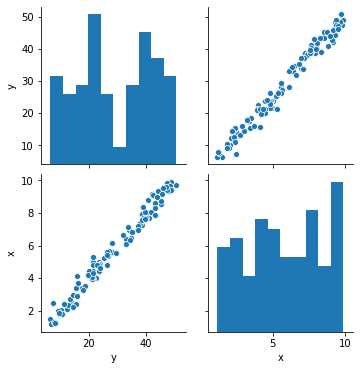

In [107]:
sns.pairplot(df1)

Good positive correlation, no transformations needed

In [108]:
model = sm.ols('y~x', data = df1)
model = model.fit()
model.params

Intercept    0.238070
x            4.984259
dtype: float64

Intercept is 0.23807, slope is 4.984259, therefore based on the results of the regression model our prediction equation will be y = 4.984259x + 0.23807 

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           4.47e-84
Time:                        20:13:55   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

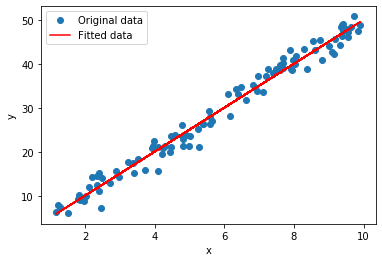

In [110]:
y_int, m = model.params
df1['y_est'] = m*df1.x + y_int

plt.plot(df1.x, df1.y, 'o', label = "Original data")
plt.plot(df1.x, df1.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

count    1.000000e+02
mean     8.704149e-16
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: Residuals, dtype: float64

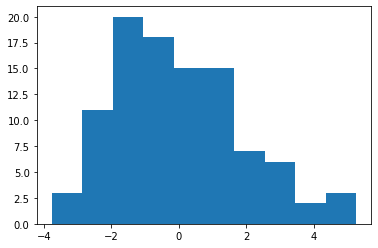

In [111]:
df1['Residuals'] = df1['y_est'] - df1['y']
df1_residual_histo = plt.hist(df1.Residuals)
df1['Residuals'].describe()

The residuals are close to a normal distribution. Residuals mean is very close to 0, 7.994 x 10^(-16) and the prediction error ranges from -3.76 to 5.25. 

**Set 2**

In [112]:
df2 = pd.read_excel(a4xls, 'Set 2')
df2.head()

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


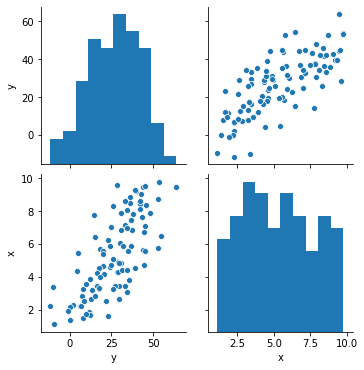

In [113]:
sns.pairplot(df2)

In [114]:
m2 = sm.ols('y~x', data = df2)
m2 = m2.fit()
m2.params

Intercept    1.095552
x            4.777354
dtype: float64

Intercept of 1.095552 and slope of 4.777354, therefore equation is y = 4.777354x + 1.095552

In [115]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.11e-19
Time:                        20:13:57   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

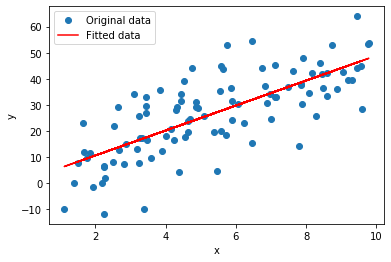

In [116]:
y_int, m = m2.params
df2['y_est'] = m*df2.x + y_int

plt.plot(df2.x, df2.y, 'o', label = "Original data")
plt.plot(df2.x, df2.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

count    1.000000e+02
mean    -1.271871e-14
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: Residuals, dtype: float64

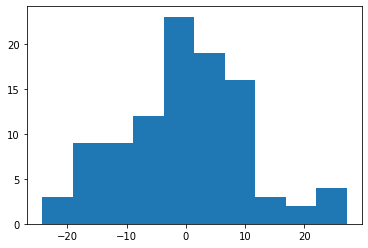

In [117]:
df2['Residuals'] = df2['y_est'] - df2['y']
df2_residual_histo = plt.hist(df2.Residuals)
df2['Residuals'].describe()

Normal distribution, residual mean is near 0, prediction error ranges from -24.3 to 27.1

**Set 3**

In [118]:
df3 = pd.read_excel(a4xls, 'Set 3')
df3.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


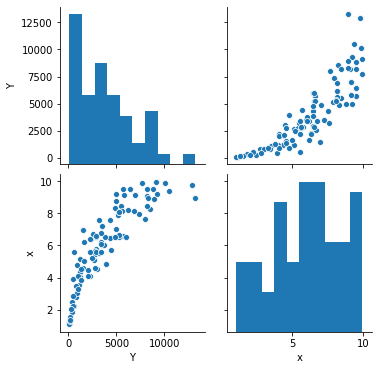

In [119]:
sns.pairplot(df3)

Looks like exponential distribution, so transformations are needed

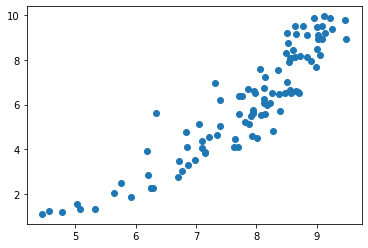

In [120]:
df3['log_y'] = np.log(df3['Y'])
plt.plot(df3.log_y,df3.x, 'o')

More linear now, time for the model

In [121]:
m3 = sm.ols('log_y~x', data = df3)
m3 = m3.fit()
m3.params

Intercept    5.171611
x            0.436849
dtype: float64

Intercept of 5.171611 and slope of 0.436849, therefore equation is y = 0.436849x + 5.171611

In [122]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.7
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           5.82e-41
Time:                        20:13:58   Log-Likelihood:                -64.530
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      98   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1716      0.124     41.690      0.000       4.925       5.418
x              0.4368      0.019     22.796      0.000       0.399       0.475
==============================================================================
Omnibus:                        3.457   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.160
Skew:                          -0.435   Prob(JB):                        0.206
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

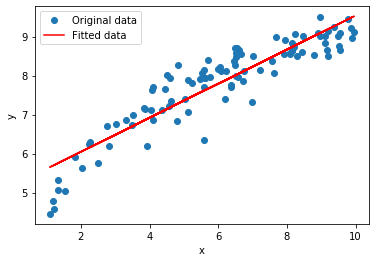

In [123]:
y_int, m = m3.params
df3['y_est'] = m*df3.x + y_int

plt.plot(df3.x, df3.log_y, 'o', label = "Original data")
plt.plot(df3.x, df3.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

count    1.000000e+02
mean    -3.019807e-16
std      4.636569e-01
min     -9.953774e-01
25%     -3.110409e-01
50%     -2.374832e-02
75%      2.706744e-01
max      1.274040e+00
Name: Residuals, dtype: float64

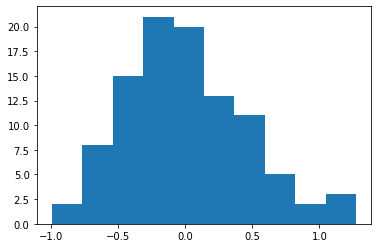

In [124]:
df3['Residuals'] = df3['y_est'] - df3['log_y']
df3_residual_histo = plt.hist(df3.Residuals)
df3['Residuals'].describe()

Normal distribution, mean is close to 0, prediction error range is from -0.995 to 1.274.

**Set 4**

In [125]:
df4 = pd.read_excel(a4xls, 'Set 4')
df4.head()

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


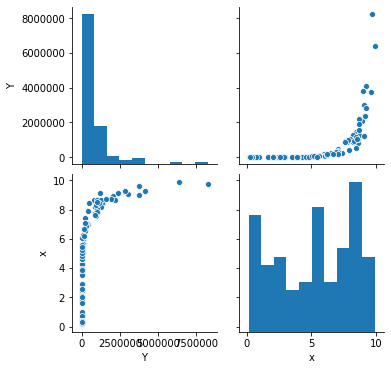

In [126]:
sns.pairplot(df4)

Will need to transform, too exponential

In [127]:
df4['log_y'] = np.log(df4['Y'])

In [128]:
m4 = sm.ols('log_y~x', data = df4)
m4 = m4.fit()
m4.params

Intercept    5.664722
x            0.989848
dtype: float64

Intercept of 5.664722 and slope of 0.989848, therefore equation is y = 0.989848x + 5.664722

In [129]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.91e-89
Time:                        20:14:00   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

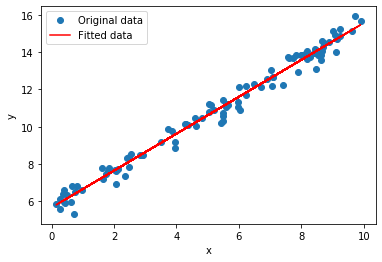

In [130]:
y_int, m = m4.params
df4['y_est'] = m*df4.x + y_int

plt.plot(df4.x, df4.log_y, 'o', label = "Original data")
plt.plot(df4.x, df4.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


count    1.000000e+02
mean    -1.945111e-15
std      3.853615e-01
min     -6.403407e-01
25%     -2.803581e-01
50%     -4.510877e-02
75%      1.901438e-01
max      1.057768e+00
Name: Residuals, dtype: float64

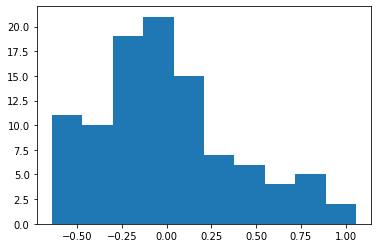

In [131]:
df4['Residuals'] = df4['y_est'] - df4['log_y']
df4_residual_histo = plt.hist(df4.Residuals)
df4['Residuals'].describe()

Close to a normal distribution, mean is close to 0, and prediction error ranges from -0.640 to 1.058

In [132]:
df5 = pd.read_excel(a4xls, 'Set 5')
df5.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


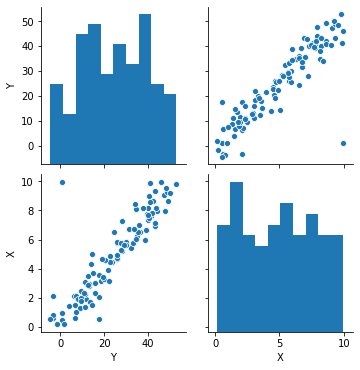

In [133]:
sns.pairplot(df5)

Aside from the few outliers we have good linear distribution. No transformations needed at this time

In [134]:
m5 = sm.ols('Y~X', data = df5)
m5 = m5.fit()
m5.params

Intercept    0.921257
X            4.767081
dtype: float64

 Intercept of 0.921257 and slope of 4.767081, therefore equation is y = 4.767081x + 0.921257

In [135]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           4.70e-37
Time:                        20:14:02   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

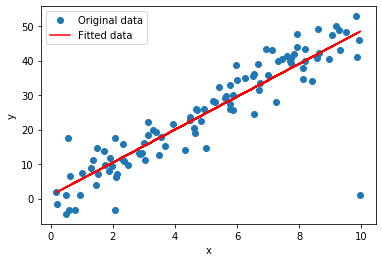

In [136]:
y_int, m = m5.params
df5['y_est'] = m*df5.X + y_int

plt.plot(df5.X, df5.Y, 'o', label = "Original data")
plt.plot(df5.X, df5.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

count    1.010000e+02
mean     6.683323e-15
std      6.666383e+00
min     -1.403782e+01
25%     -3.542946e+00
50%     -1.164350e+00
75%      2.449717e+00
max      4.742030e+01
Name: Residuals, dtype: float64

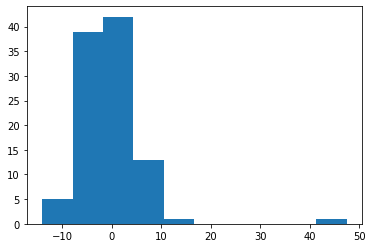

In [137]:
df5['Residuals'] = df5['y_est'] - df5['Y']
df5_residual_histo = plt.hist(df5.Residuals)
df5['Residuals'].describe()

Apart from the outlier, we see very good normal distribution. The mean is close to 0, and the prediction error ranges from -14.034 to 47.421. Let us now compare the OLS without the outlier

In [138]:
df5.max()

Y            52.839325
X             9.970710
y_est        48.452437
Residuals    47.420297
dtype: float64

Based on the max function our outlier seems to be above 47 so we will subset to include all values with residuals under 47

In [139]:
df5_wo = df5[df5.Residuals < 47]  #df5_wo = df5_without_outlier
df5_wo.max() #results look good to continue

Y            52.839325
X             9.939200
y_est        48.302226
Residuals    14.231371
dtype: float64

In [140]:
df5_wo.head() #will need to clear the old y_est and Residuals to refit
del df5_wo['y_est']
del df5_wo['Residuals']
df5_wo.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


In [141]:
m5wo = sm.ols('Y~X', data = df5_wo)
m5wo = m5wo.fit()
m5wo.params

Intercept   -0.099290
X            5.070538
dtype: float64

 Intercept of -0.099290 and slope of 5.070538, therefore equation is y = 5.070538x - 0.099290. We've got a new lower y intercept and a slightly steeper slope

In [142]:
m5wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.84e-52
Time:                        20:14:03   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
X              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\athi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


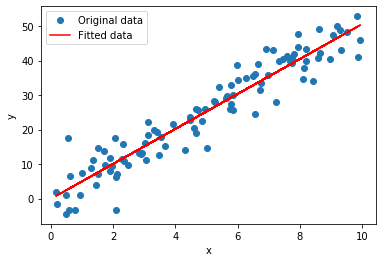

In [143]:
y_int, m = m5wo.params
df5_wo['y_est'] = m*df5_wo.X + y_int

plt.plot(df5_wo.X, df5_wo.Y, 'o', label = "Original data")
plt.plot(df5_wo.X, df5_wo.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Outlier is gone, and line fits slightly better from an eye test perspective. We can also confirm that by looking at the increase in the R squared value (seen in model summary). Based of the changes seen, the outlier seemed to have leverage

**Tab 6**

In [144]:
df6 = pd.read_excel(a4xls, 'Set 6')
df6.head()

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425


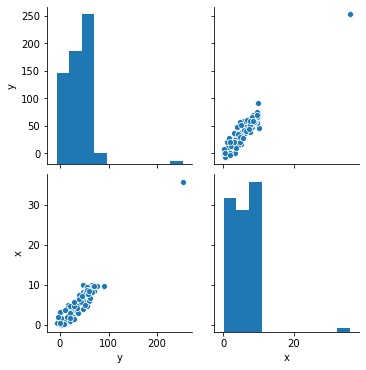

In [145]:
sns.pairplot(df6)

We do see linear regression but there is very clearly an outlier with leverage. Should remove as part of the transformations. Deciding that it has leverage is based of the results seen in tab 5, so in this greater case the same results (i.e the OLS should be run without outlier) should hold. 

In [146]:
df6.max() #whats our huge big number thats got to go

y    252.837897
x     35.783400
dtype: float64

In [147]:
df6_wo = df6[df6.y < 252] 

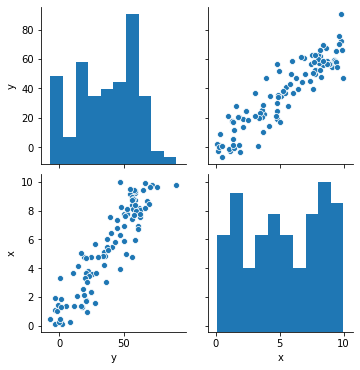

In [148]:
sns.pairplot(df6_wo)

In [149]:
m6wo = sm.ols('y~x', data = df6_wo)
m6wo = m6wo.fit()
m6wo.params

Intercept   -0.020325
x            6.970334
dtype: float64

In [150]:
m6wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.29e-40
Time:                        20:14:06   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\athi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


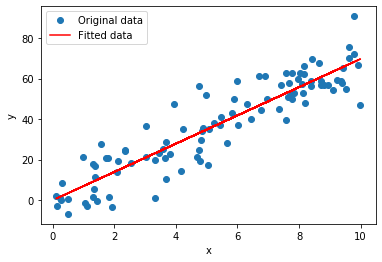

In [151]:
y_int, m = m6wo.params
df6_wo['y_est'] = m*df6_wo.x + y_int

plt.plot(df6_wo.x, df6_wo.y, 'o', label = "Original data")
plt.plot(df6_wo.x, df6_wo.y_est, 'r-', label = "Fitted data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

C:\Users\athi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1.000000e+02
mean    -1.337597e-14
std      9.295544e+00
min     -2.328386e+01
25%     -5.775247e+00
50%      4.739004e-01
75%      5.106210e+00
max      2.277057e+01
Name: Residuals, dtype: float64

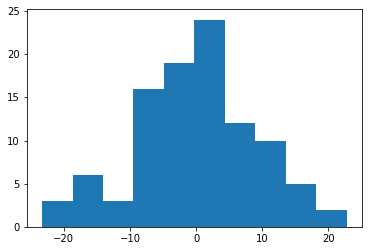

In [152]:
df6_wo['Residuals'] = df6_wo['y_est'] - df6_wo['y']
df6_wo_residual_histo = plt.hist(df6_wo.Residuals)
df6_wo['Residuals'].describe()

Normally distributed, mean is close to 0 and prediction error ranges from -23.39 to 22.77